## Time Series Preprocessing


We begin this chapter with loading the meteorological data set from the DWD. 

In [1]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the data set:
df = pd.read_csv("data/Tagesmittel_Dahlem.csv", sep=";")

# Name the columns:
df.columns = [
    "STAT",
    "Date",
    "QN",
    "TG",
    "TN",
    "TM",
    "TX",
    "RFM",
    "FM",
    "FX",
    "SO",
    "NM",
    "RR",
    "PM",
]

# Drop columns we want to ignore:
df = df.drop(columns=["STAT", "QN", "PM"])

In [3]:
df

,Date,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
0,20200325,-7.3,-2.6,3.9,11.0,41.0,3.0,11.5,11.8,0.5,0.0
1,20200324,-8.3,-4.8,2.1,8.7,46.5,3.0,10.3,11.9,0.7,0.0
2,20200323,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,11.8,0.2,0.0
3,20200322,-7.1,-2.5,1.8,6.5,55.3,3.0,11.0,11.8,0.4,0.0
4,20200321,-4.5,0.2,4.1,7.4,64.8,4.0,13.6,8.0,2.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...
494,20181117,-5.5,-2.5,1.5,5.5,84.7,3.0,9.4,7.8,1.3,0.0
495,20181116,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0
496,20181115,1.1,4.2,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0
497,20181114,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0


### **Data information**: Descriptions of the German Weather Service (Deutscher Wetterdienst; DWD):


| Abbreviation | Parameter description | 
| :-: | :-: | 
|QN| Quality level of the data |
|TG| Min. temp. at 5 cm above the ground;  °C TIII of the previous day to TI 23:51 previous day - 23:50 UTC |
|TN| Min. temp. at 2 m above the ground;  °C  TIII of the previous day to TIII 23:51 previous day - 23:50 UTC |
|TM| Mean temp. at 2 m above the ground;  °C  (TI+TII+2*TIII) / 4 Mean of 24 date values |
|TX| Max. temp. at 2 m above the ground;  °C  TIII of the previous day to TIII 23:51 previous day - 23:50 UTC |
|RFM| Mean of relative humidity % (TI+TII+TIII)/3 Mean of 24 date values |
|FM| Mean of wind force Bft (TI+TII+TIII)/3 Mean of 24 date values |
|FX| Maximum wind speed (peak gust) m/sec 00 - 23:59 UTC 23:51 previous day - 23:50 UTC |
|SO| Sum of sunshine hours 00 - 23:59 UTC 23:51 previous day - 23:50 UTC |
|NM| Mean of the eighth degree of cloud cover (TI+TII+TIII)/3 Mean of 24 date values |
|RR| Precipitation height mm TI to TI of the following day 05:51 - 05:50 UTC of the following day |
|PM| Mean  air pressure at station altitude hpa (TI+TII+TIII)/3 Mean of 24 date values |



In general, the following applies to the calculation of daily averages: 

As of 01.04.2001, the standard was changed as follows: 

Calculation of daily averages from 24 hourly values. 
If more than 3 hourly values are missing -> calculation from the 4 main dates (00, 06, 12, 18 UTC). Reference time for a day usually 23:51 UTC of the previous day to 23:50 UTC 
only the precipitation of the previous day is measured at 05:50 UTC in the morning 

The observation dates are based on the global time in Greenwich (GMT or UTC). The observation time is always 10 minutes before the reference date 
(hence the crooked times). This change was necessary after the station network was largely automated. 



#### Sort the data set by date: 2018...2020

In [4]:
df = df.sort_values(by=["Date"], ascending=True)
df

,Date,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
498,20181113,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9
497,20181114,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0
496,20181115,1.1,4.2,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0
495,20181116,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0
494,20181117,-5.5,-2.5,1.5,5.5,84.7,3.0,9.4,7.8,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4,20200321,-4.5,0.2,4.1,7.4,64.8,4.0,13.6,8.0,2.8,0.0
3,20200322,-7.1,-2.5,1.8,6.5,55.3,3.0,11.0,11.8,0.4,0.0
2,20200323,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,11.8,0.2,0.0
1,20200324,-8.3,-4.8,2.1,8.7,46.5,3.0,10.3,11.9,0.7,0.0


> ##### **Exercise:**
> What data type have the values in the `Date` column? 

In [5]:
### Your code here ####

#### solution

In [6]:
df["Date"]

498    20181113
497    20181114
496    20181115
495    20181116
494    20181117
         ...   
4      20200321
3      20200322
2      20200323
1      20200324
0      20200325
Name: Date, Length: 499, dtype: int64

We found that we are dealing with `int 64` (Integers) here. But we would like to transorm these numbers to dates!

### Python's Datetime
> Transform integers to dates:

In [7]:
from datetime import datetime

df["Datum"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df.head()

,Date,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,Datum
498,20181113,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,2018-11-13
497,20181114,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,2018-11-14
496,20181115,1.1,4.2,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,2018-11-15
495,20181116,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0,2018-11-16
494,20181117,-5.5,-2.5,1.5,5.5,84.7,3.0,9.4,7.8,1.3,0.0,2018-11-17


In [8]:
df["Datum"]

498   2018-11-13
497   2018-11-14
496   2018-11-15
495   2018-11-16
494   2018-11-17
         ...    
4     2020-03-21
3     2020-03-22
2     2020-03-23
1     2020-03-24
0     2020-03-25
Name: Datum, Length: 499, dtype: datetime64[ns]

Well done! The type is now datetime! Now we would like the dates to be our indices instead of the numbers. 

#### Set the date as Index: 

First, delete the 'Data' - column. Second, set the 'Datum' columns as index: 

In [9]:
# set the 'Datum' columns as index:
df = df.set_index("Datum")

# Drop columns we want to ignore:
df = df.drop(columns=["Date"])

In [10]:
df

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
Datum,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0
2018-11-15,1.1,4.2,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0
2018-11-17,-5.5,-2.5,1.5,5.5,84.7,3.0,9.4,7.8,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-21,-4.5,0.2,4.1,7.4,64.8,4.0,13.6,8.0,2.8,0.0
2020-03-22,-7.1,-2.5,1.8,6.5,55.3,3.0,11.0,11.8,0.4,0.0
2020-03-23,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,11.8,0.2,0.0


### Benefits of the DatetimeIndex


#### Subsetting and slicing

A very common task in time series analysis is the subsetting of a time series.

Mybe you are interested in the oldest or newest observations, or you would like to extract a certain range of data:

Since we have set the data as index, we can easily look at the data of a certain time: 

In [11]:
df.loc["2018-11-13"]

TG      4.4
TN      6.8
TM      9.7
TX     12.3
RFM    97.4
FM      2.0
FX     11.2
SO      1.1
NM      6.0
RR      8.9
Name: 2018-11-13 00:00:00, dtype: float64

Or we can have a look at the data of a certain time interval: 

How was the weather last June?

In [12]:
df_June = df["2019-06-1":"2019-06-30"]
df_June

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
Datum,,,,,,,,,,
2019-06-01,10.3,14.0,20.3,27.1,68.0,2.0,10.9,12.7,4.0,0.0
2019-06-02,10.1,14.6,22.7,31.3,60.3,2.0,7.4,13.4,3.1,0.0
2019-06-03,11.4,15.6,24.8,33.2,52.8,3.0,17.1,11.9,2.9,0.0
2019-06-04,13.3,17.2,23.6,30.6,61.0,2.0,8.8,11.6,2.9,0.0
2019-06-05,12.2,16.0,25.7,33.6,56.1,3.0,10.7,14.2,1.3,0.0
2019-06-06,14.1,14.5,21.0,31.7,78.3,3.0,13.4,8.4,4.8,5.4
2019-06-07,10.1,12.8,19.4,25.7,68.9,2.0,9.8,14.1,2.5,0.1
2019-06-08,5.9,10.4,17.9,22.6,59.3,3.0,16.8,8.6,3.8,0.0
2019-06-09,4.8,8.7,18.8,25.9,53.9,2.0,9.5,12.5,4.7,3.4


Another nice feature using Python and Python's datetime is to generate a new time series. 
We can define a starting date `start="6/1/2019`and a end date `end="6/30/2020`of the series. 

Moreover, we can define a frequency, for example daily, 'D', hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days. There are many more...

For example:

In [13]:
New_series = pd.date_range(start="6/1/2019", end="6/1/2020", freq="B")
New_series

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', length=261, freq='B')

or: 

In [14]:
daily_index = pd.date_range(start="4/1/2018", end="4/30/2018", freq="D")
daily_index

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')


#### Easy plotting

We take again a look at the DWD-data to see one major benefit of the DatetimeIndex.

Plot the whole data set


<Axes: xlabel='Datum'>

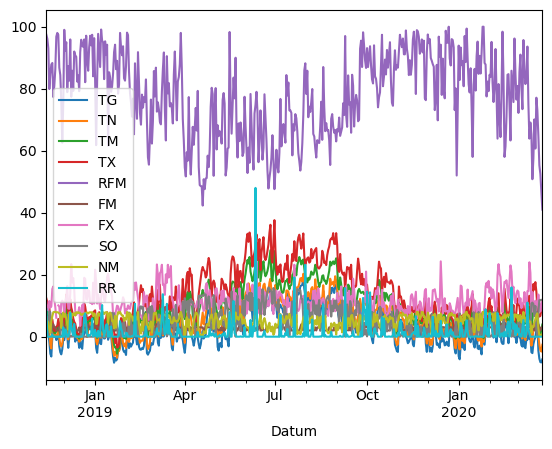

In [15]:
import matplotlib.pyplot as plt

df.plot()

Or a variable that you yould like to analyize, for exmaple the mean temperature:

<Axes: xlabel='Datum'>

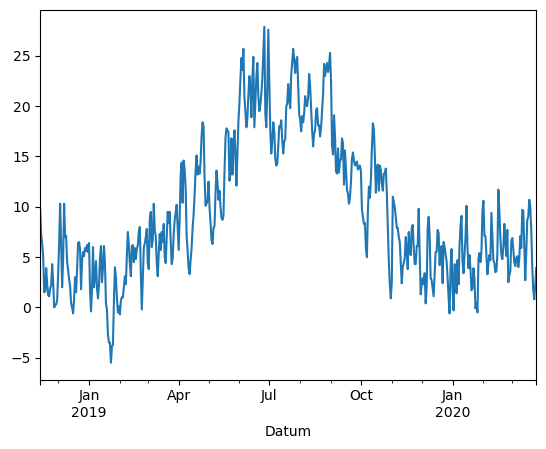

In [16]:
df["TM"].plot()

> #### **Exercise:**
> Was the sun shining summer 2019? Plot the Sonnenscheindauer 'SO' (or another variable) from the DWD data set for the time slice Mai, Juni, July and August 2019



###  Summary statistics

Recall the basic functions for statistics using pandas: 

* Quantiles: `DataFrame.quantile(self, q=0.5, axis=0, numeric_only=True, interpolation='linear')` 

* Median: `DataFrame.median(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)

* Mean: `DataFrame.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)`

* Variance: `DataFrame.var(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)`

* Standard deviation: `DataFrame.std(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)`


To get a quick overview on the statistical characteristics of time series we can also use the describe() function. The function returns basic statistics for the whole data set.

In [17]:
df.describe()

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,498.000000,499.000000,499.000000,499.000000
mean,2.829259,5.308016,9.466934,13.663327,77.739880,2.803607,11.627309,4.785571,5.353507,1.424048
std,5.781158,5.769047,6.934181,8.509267,13.515453,0.689499,3.813549,4.560062,2.019166,3.571932
min,-8.400000,-6.800000,-5.500000,-3.500000,41.000000,1.000000,3.500000,0.000000,0.000000,0.000000
25%,-1.600000,0.950000,4.350000,7.000000,67.600000,2.000000,8.925000,0.300000,4.100000,0.000000
50%,1.700000,4.100000,7.500000,11.400000,78.800000,3.000000,11.000000,3.500000,5.800000,0.000000
75%,6.700000,9.400000,14.400000,20.150000,88.450000,3.000000,13.600000,8.350000,7.000000,1.200000
max,19.200000,20.300000,27.900000,37.600000,100.000000,5.000000,24.300000,15.900000,8.000000,48.000000


In [18]:
df.describe().round(1)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
count,499.0,499.0,499.0,499.0,499.0,499.0,498.0,499.0,499.0,499.0
mean,2.8,5.3,9.5,13.7,77.7,2.8,11.6,4.8,5.4,1.4
std,5.8,5.8,6.9,8.5,13.5,0.7,3.8,4.6,2.0,3.6
min,-8.4,-6.8,-5.5,-3.5,41.0,1.0,3.5,0.0,0.0,0.0
25%,-1.6,1.0,4.4,7.0,67.6,2.0,8.9,0.3,4.1,0.0
50%,1.7,4.1,7.5,11.4,78.8,3.0,11.0,3.5,5.8,0.0
75%,6.7,9.4,14.4,20.2,88.4,3.0,13.6,8.4,7.0,1.2
max,19.2,20.3,27.9,37.6,100.0,5.0,24.3,15.9,8.0,48.0


The describe function can be applied to time slices, too! 

In [19]:
df["2019-01-01":"2020-01-1"].describe().round(1)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
count,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
mean,3.9,6.5,11.2,15.8,76.0,2.7,11.4,5.6,5.1,1.4
std,6.1,6.1,7.2,8.8,13.6,0.7,3.6,4.7,2.0,3.8
min,-8.4,-6.8,-5.5,-3.5,42.3,1.0,4.4,0.0,0.0,0.0
25%,-1.0,1.7,5.5,8.4,65.8,2.0,8.9,1.2,3.9,0.0
50%,3.2,6.0,10.3,15.6,76.0,3.0,10.8,4.9,5.4,0.0
75%,8.9,11.4,17.0,22.7,87.2,3.0,13.1,9.7,6.7,1.1
max,19.2,20.3,27.9,37.6,100.0,5.0,24.3,15.9,8.0,48.0


.. you can ask only for the mean (standard deviation and so on...) seperately. What are the mean values in January 2020? 

###  Generating DatetimeIndex with periods and frequency arguments

If we need to create a index with the dates of our data, we can do it with Python as follows: 

`pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs`  

Return a fixed frequency DatetimeIndex

**Parameters:**

* start: str or datetime-like, optional, Left bound for generating dates.
* end: str or datetime-like, optional, Right bound for generating dates.
* periods: int, optional, Number of periods to generate.
* freq: str or DateOffset, default ‘D’
* Frequency strings can have multiples, e.g. ‘5H’. See here for a list of frequency aliases.
* tz: str or tzinfo, optional, Time zone name for returning localized DatetimeIndex, for example ‘Asia/Hong_Kong’. By default, the resulting DatetimeIndex is timezone-naive.
* normalize: bool, default False
* Normalize start/end dates to midnight before generating date range.
* namestr, default None, Name of the resulting DatetimeIndex.
*  closed{None, ‘left’, ‘right’}, optional, Make the interval closed with respect to the given frequency to the ‘left’, ‘right’, or both sides (None, the default).


The default input for the frequency is 'D' which stands for daily. But there are many more specifications for the frequency: 

* B business day frequency
* C custom business day frequency
* D calendar day frequency
* W weekly frequency
* M month end frequency
* Q quarter end frequency
* H hourly frequency
* T, min minutely frequency
* S secondly frequency

There are more... see: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

Let us create a data set starting from the first of January 2011 with 72 entries on a daily basis: 

In [20]:
rng = pd.date_range("1/1/2019", periods=72, freq="D")

In [21]:
rng

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

We have created an index and now fill randomly numbers between 0 and 9. 

In [22]:
import numpy as np

ts = pd.Series(np.random.randint(0, 10, len(rng)), index=rng)
ts

2019-01-01    3
2019-01-02    1
2019-01-03    4
2019-01-04    5
2019-01-05    9
             ..
2019-03-09    9
2019-03-10    2
2019-03-11    0
2019-03-12    1
2019-03-13    1
Freq: D, Length: 72, dtype: int64

As another example, let’s create a date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.

In [23]:
pd.date_range("2004-09-20", periods=8, freq="H")

/var/folders/vs/k3tcf9r11xq5pqzsg6kq3sx00000gn/T/ipykernel_9537/2091515546.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2004-09-20', periods=8, freq='H')


DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [24]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings

times_sample = pd.to_datetime(["2018-11-13", "2018-11-14", "2018-11-15"])

# Select the specified dates and just the Consumption column
TM_sample = df.loc[times_sample, ["TM", "RR"]].copy()
TM_sample

,TM,RR
2018-11-13,9.7,8.9
2018-11-14,7.2,0.0
2018-11-15,6.3,0.0


In [25]:
df

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR
Datum,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0
2018-11-15,1.1,4.2,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0
2018-11-17,-5.5,-2.5,1.5,5.5,84.7,3.0,9.4,7.8,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-21,-4.5,0.2,4.1,7.4,64.8,4.0,13.6,8.0,2.8,0.0
2020-03-22,-7.1,-2.5,1.8,6.5,55.3,3.0,11.0,11.8,0.4,0.0
2020-03-23,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,11.8,0.2,0.0


Creating a time range with dateteime for example, for the year 2011

In [26]:
from datetime import datetime

start = datetime(2011, 1, 1)

end = datetime(2012, 1, 1)

index = pd.date_range(start, end)

In [27]:
pd.date_range(start, periods=10, freq="M")

/var/folders/vs/k3tcf9r11xq5pqzsg6kq3sx00000gn/T/ipykernel_9537/2612626636.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start, periods=10, freq='M')


DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [28]:
pd.date_range(start, periods=4, freq="QS")

DatetimeIndex(['2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

### Pandas series vs. dataframe

Recall: While a dataframe can be used to analyse many variables, the pandas series is a **One-dimensional** ndarray with axis labels (including time series). Like this example: 

In [29]:
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04", "2015-07-04", "2015-08-04"])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64


### Dealing with missing values (NaNs)?


Missing values in data sets are a well-known problem as nearly everywhere, where data is measured and recorded, issues with missing values occur. Missing values can lead to problems, because often further data processing and analysis steps rely on complete data sets. Therefore missing values need to be replaced with reasonable values. In statistics this process is called [**imputation**](https://en.wikipedia.org/wiki/Imputation_(statistics)).




### Imputation of univariate time series

Techniques capable of doing imputation for univariate time series can be roughly divided into three categories ([Moritz et al. 2015](https://arxiv.org/abs/1510.03924)):

* **Univariate algorithms** These algorithms work with univariate inputs, but typically do not employ the time series character of the data set. Examples are: *mean*, *mode*, *median*, *random sample*.

* **Univariate time series algorithms** These algorithms are also able to work with univariate inputs, but make use of the time series characteristics. Examples of simple algorithms of this category are *last observation carried forward (locf)*, *next observation carried backward (nocb)*, *arithmetic smoothing* and *linear interpolation*. The more advanced algorithms are based on structural time series models and can handle seasonality.

* **Multivariate algorithms on lagged data** Usually, multivariate algorithms can not be applied on univariate data. But since time is an implicit variable for time series, it is possible to add time information as covariates in order to make it possible to apply multivariate imputation algorithms. 


Let us test our possibilities to handle missing data. We will continue using our loaded data set `Tagesmittel_Dahlem_MD.csv`

In [30]:
import pandas as pd

df = pd.read_csv(
    "data/Tagesmittel_Dahlem_MD.csv", sep=";"
)  # ,parse_dates=["Date"], index_col="Date")

df.columns = [
    "STAT",
    "Date",
    "QN",
    "TG",
    "TN",
    "TM",
    "TX",
    "RFM",
    "FM",
    "FX",
    "SO",
    "NM",
    "RR",
    "PM",
]

df = df.drop(columns=["STAT", "QN"])

In [31]:
df = df.sort_values(by=["Date"], ascending=True)

df["Datum"] = pd.to_datetime(df["Date"], format="%Y%m%d")

df = df.set_index("Datum")
df = df.drop(["Date"], axis=1)

In [32]:
df

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM
Datum,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5
2018-11-15,1.1,NaN,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,NaN,1025.1
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,4.7,5.2,7.7,9.5,73.0,2.0,11.2,0.0,7.5,0.0,1016.1
2020-03-21,-4.5,0.2,4.1,7.4,NaN,4.0,13.6,8.0,2.8,0.0,1021.0
2020-03-23,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,NaN,0.2,0.0,1029.5


#### Count the numbers of NaN in each column

In [33]:
df.isnull().sum()

TG     4
TN     8
TM     8
TX     3
RFM    5
FM     1
FX     4
SO     2
NM     1
RR     3
PM     3
dtype: int64

Further, we calculate the percentage of missing values for the data set. 

In [34]:
df.isnull().sum() / df.shape[0]

TG     0.008130
TN     0.016260
TM     0.016260
TX     0.006098
RFM    0.010163
FM     0.002033
FX     0.008130
SO     0.004065
NM     0.002033
RR     0.006098
PM     0.006098
dtype: float64

In [35]:
df.shape[0]

492

#### Fill the NaNs 
Fill the NaNs  with values using the `fillna()` function:

In [36]:
df["RR"] = df["RR"].fillna(0)
df["RR"]

Datum
2018-11-13    8.9
2018-11-14    0.0
2018-11-15    0.0
2018-11-16    0.0
2018-11-18    0.0
             ... 
2020-03-20    0.0
2020-03-21    0.0
2020-03-23    0.0
2020-03-24    0.0
2020-03-25    0.0
Name: RR, Length: 492, dtype: float64

In [37]:
df["TN"] = df["TN"].fillna(df["TN"].mean())

In [38]:
df

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM
Datum,,,,,,,,,,,
2018-11-13,4.4,6.800000,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3
2018-11-14,1.2,4.700000,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5
2018-11-15,1.1,5.382438,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6
2018-11-16,-1.6,1.600000,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0,1025.1
2018-11-18,-6.4,-3.800000,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,4.7,5.200000,7.7,9.5,73.0,2.0,11.2,0.0,7.5,0.0,1016.1
2020-03-21,-4.5,0.200000,4.1,7.4,NaN,4.0,13.6,8.0,2.8,0.0,1021.0
2020-03-23,-8.2,-4.400000,0.8,6.7,52.5,2.0,8.1,NaN,0.2,0.0,1029.5


In [39]:
df["TN"].mean()

5.382438016528926

In [40]:
df["TN"] = df["TN"].round(1)

In [41]:
df

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM
Datum,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5
2018-11-15,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0,1025.1
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,4.7,5.2,7.7,9.5,73.0,2.0,11.2,0.0,7.5,0.0,1016.1
2020-03-21,-4.5,0.2,4.1,7.4,NaN,4.0,13.6,8.0,2.8,0.0,1021.0
2020-03-23,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,NaN,0.2,0.0,1029.5


Instead of filling NaNs by a single value we can also fill by e.g. monthly or weekly means. 

Add columns with year, month...

In [42]:
df["Year"] = df.index.year
df["Month"] = df.index.month


df.head(5)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM,Year,Month
Datum,,,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3,2018,11
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5,2018,11
2018-11-15,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0,1025.1,2018,11
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9,2018,11


Group the data by e.g. month, year, weekday etc.
Then fill the NaNs with the corresponding mean. 

In [43]:
df.fillna(df.groupby(df.Month).transform("mean"), inplace=True)

In [44]:
df
df.round(1)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM,Year,Month
Datum,,,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3,2018,11
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5,2018,11
2018-11-15,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-16,-1.6,1.6,5.0,9.3,79.9,3.0,11.5,8.2,2.3,0.0,1025.1,2018,11
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,4.7,5.2,7.7,9.5,73.0,2.0,11.2,0.0,7.5,0.0,1016.1,2020,3
2020-03-21,-4.5,0.2,4.1,7.4,76.5,4.0,13.6,8.0,2.8,0.0,1021.0,2020,3
2020-03-23,-8.2,-4.4,0.8,6.7,52.5,2.0,8.1,4.0,0.2,0.0,1029.5,2020,3


Proof if all NaNs are filled and calcualte the sum of the NaN again:

In [45]:
df.isnull().sum()

TG       0
TN       0
TM       0
TX       0
RFM      0
FM       0
FX       0
SO       0
NM       0
RR       0
PM       0
Year     0
Month    0
dtype: int64

> #### **Exercise:**
> 1. Load the data set Tagesmittel_Dahlem_MD.csv <br>
> 2. Fill the missing values of the maximal temperature variable TX with the monthly mean 
> 3. Calculate and plot the weekly mean of maximal temperature varible TX <br>


### Missing data (rows)

Next, we use the drop function to create some missing data rows of our data set:

In [46]:
df = df.drop(df.index[[3, 7]])
df = df.round(1)
df.head(10)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM,Year,Month
Datum,,,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3,2018,11
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5,2018,11
2018-11-15,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9,2018,11
2018-11-19,-0.1,2.2,3.9,5.6,88.3,4.0,15.4,0.5,6.6,0.7,1013.2,2018,11
2018-11-20,1.2,1.7,2.3,3.3,77.3,4.0,16.2,0.0,7.9,0.0,1009.3,2018,11
2018-11-22,0.5,0.5,1.1,1.9,86.3,3.0,9.5,0.0,8.0,0.0,1014.8,2018,11
2018-11-23,-1.1,0.5,1.9,3.2,96.8,2.0,6.1,0.0,7.8,0.0,1012.1,2018,11
2018-11-24,0.5,0.2,2.2,3.5,98.0,2.0,10.1,0.0,7.9,0.0,1004.9,2018,11


NaNs can also be filled when we convert TimeSeries to specified frequency with the function asfreq()

`DataFrame.asfreq(self: ~ FrameOrSeries, freq, method=None, how: Union[str, NoneType] = None, normalize: bool = False, fill_value=None`

There are two methods to fill the holes in reindexed Series (note this does not fill NaNs that already were present) with the last valid obervation or with the next valid oberservation:

* method = 'pad’ / ‘ffill’: propagate last valid observation forward to next valid

* Or you can specify a fill value, for example `fill_value = -9999`




In [47]:
df = df.asfreq("D", method="ffill")
# df = df.asfreq('D',fill_value=-9999)
df.head(10)

,TG,TN,TM,TX,RFM,FM,FX,SO,NM,RR,PM,Year,Month
Datum,,,,,,,,,,,,,
2018-11-13,4.4,6.8,9.7,12.3,97.4,2.0,11.2,1.1,6.0,8.9,1012.3,2018,11
2018-11-14,1.2,4.7,7.2,11.0,96.1,2.0,8.8,6.4,5.0,0.0,1019.5,2018,11
2018-11-15,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-16,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-17,1.1,5.4,6.3,10.4,93.0,3.0,8.5,0.5,4.6,0.0,1020.6,2018,11
2018-11-18,-6.4,-3.8,1.6,5.8,87.8,2.0,9.8,1.6,5.0,0.0,1020.9,2018,11
2018-11-19,-0.1,2.2,3.9,5.6,88.3,4.0,15.4,0.5,6.6,0.7,1013.2,2018,11
2018-11-20,1.2,1.7,2.3,3.3,77.3,4.0,16.2,0.0,7.9,0.0,1009.3,2018,11
2018-11-21,1.2,1.7,2.3,3.3,77.3,4.0,16.2,0.0,7.9,0.0,1009.3,2018,11


### Resampling

It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (**downsampling**) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was downsampled from the original hourly time series. Resampling to a higher frequency (**upsampling**) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.
For example, let’s resample the data to a weekly mean time series.

In [48]:
df["TN"].resample("W").mean().head()

Datum
2018-11-18    3.983333
2018-11-25    1.342857
2018-12-02   -0.242857
2018-12-09    4.271429
2018-12-16    0.757143
Freq: W-SUN, Name: TN, dtype: float64

In [49]:
df["TN"].resample("M").mean().head()

/var/folders/vs/k3tcf9r11xq5pqzsg6kq3sx00000gn/T/ipykernel_9537/1504971345.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['TN'].resample('M').mean().head()


Datum
2018-11-30    1.416667
2018-12-31    2.777419
2019-01-31   -0.870968
2019-02-28    0.317857
2019-03-31    3.129032
Freq: ME, Name: TN, dtype: float64

In [50]:
df["TN"].resample("QS").mean().head()

Datum
2018-10-01     2.277551
2019-01-01     0.876667
2019-04-01     8.919780
2019-07-01    12.444565
2019-10-01     3.864130
Freq: QS-JAN, Name: TN, dtype: float64

/var/folders/vs/k3tcf9r11xq5pqzsg6kq3sx00000gn/T/ipykernel_9537/541710662.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['TN'].resample('M').mean().plot(kind='bar')


<Axes: xlabel='Datum'>

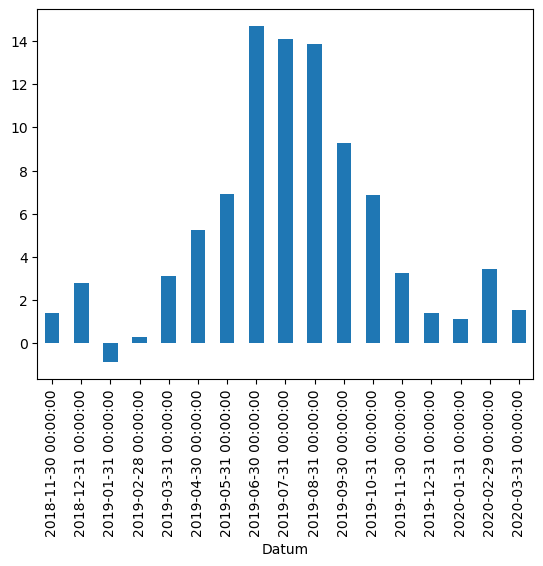

In [51]:
df["TN"].resample("M").mean().plot(kind="bar")

Let’s plot the daily and weekly sunshine duration and temperature together over a winter.

In [52]:
data_columns = ["SO", "TN"]
# Resample to weekly frequency, aggregating with mean
df_weekly_mean = df[data_columns].resample("W").mean()
df_weekly_mean.head(10)

,SO,TN
Datum,,
2018-11-18,1.766667,3.983333
2018-11-25,0.071429,1.342857
2018-12-02,1.942857,-0.242857
2018-12-09,1.700000,4.271429
2018-12-16,0.214286,0.757143
2018-12-23,0.157143,1.742857
2018-12-30,0.000000,4.228571
2019-01-06,0.428571,0.500000
2019-01-13,0.071429,1.657143


How do the different downsamples (daily/weekly) look like?

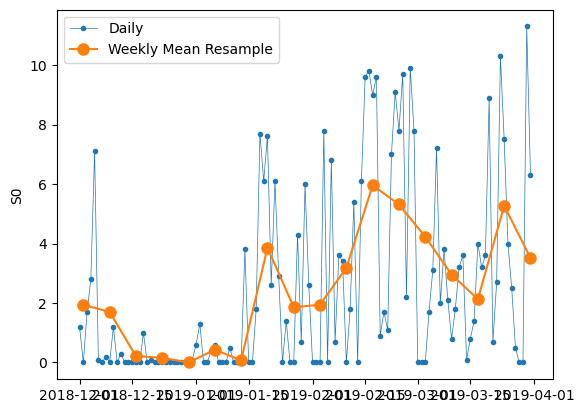

In [53]:
# Start and end of the date range to extract
start, end = "2018-12", "2019-03"

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(
    df.loc[start:end, "SO"], marker=".", linestyle="-", linewidth=0.5, label="Daily"
)
ax.plot(
    df_weekly_mean.loc[start:end, "SO"],
    marker="o",
    markersize=8,
    linestyle="-",
    label="Weekly Mean Resample",
)
ax.set_ylabel("S0")
ax.legend()

In [54]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data

opsd_monthly = df["SO"].resample("M").sum(min_count=28)
opsd_monthly.head(3)

/var/folders/vs/k3tcf9r11xq5pqzsg6kq3sx00000gn/T/ipykernel_9537/1794355598.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  opsd_monthly = df['SO'].resample('M').sum(min_count=28)


Datum
2018-11-30     NaN
2018-12-31    15.8
2019-01-31    57.0
Freq: ME, Name: SO, dtype: float64

> #### **Exercise:**
> Compute the weekly and monthly means of the maximal temperature TX of the DWD data set in the time range 1.1.2019 -- 31.12.2019. 
> Plot the results.

### Rolling windows

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.
By default, all data points within a window are equally weighted in the aggregation, but this can be changed by specifying window types such as Gaussian, triangular, and others. We’ll stick with the standard equally weighted window here.
Let’s use the `rolling` method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are:

In [55]:
# Compute the centered 7-day rolling mean
df_7d = df["SO"].rolling(7, center=True).mean()
df_7d

Datum
2018-11-13         NaN
2018-11-14         NaN
2018-11-15         NaN
2018-11-16    1.585714
2018-11-17    1.428571
                ...   
2020-03-21    6.257143
2020-03-22    6.528571
2020-03-23         NaN
2020-03-24         NaN
2020-03-25         NaN
Freq: D, Name: SO, Length: 499, dtype: float64

We can see that the first non-missing rolling mean value is on 2018-11-16, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of Dez-Feb 2018/2019 sunshine duration to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data

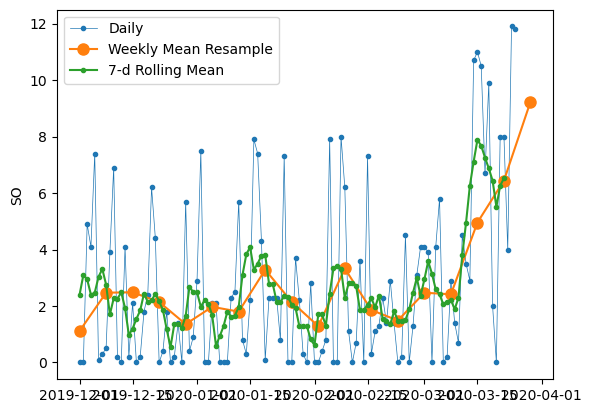

In [56]:
# Start and end of the date range to extract
start, end = "2019-12", "2020-03"

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(
    df.loc[start:end, "SO"], marker=".", linestyle="-", linewidth=0.5, label="Daily"
)

ax.plot(
    df_weekly_mean.loc[start:end, "SO"],
    marker="o",
    markersize=8,
    linestyle="-",
    label="Weekly Mean Resample",
)

ax.plot(df_7d.loc[start:end], marker=".", linestyle="-", label="7-d Rolling Mean")

ax.set_ylabel("SO")
ax.legend()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.

> #### **Exercise:**
> Compute the rooling  3 day, 7 day and 14 day rolling means of the maximal temperature TX of the DWD data set in the time range 1.1.2019 -- 31.12.2019. 
> Plot the results.

### Trends

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.
A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

Computing the rolling mean over longer time perdiods, for example a 365 day rolling mean, is especially interesting for climatological data sets! 


#### A short remark on Plotting: 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics of the time series data. There are lots of possibilities for nice plotting

See https://seaborn.pydata.org for more. 

We have a look at some examples: 


In [57]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={"figure.figsize": (11, 4)})

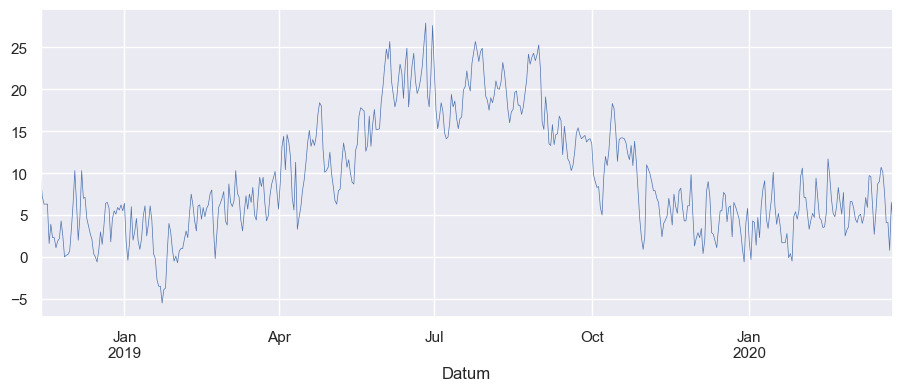

In [58]:
df["TM"].plot(linewidth=0.5)

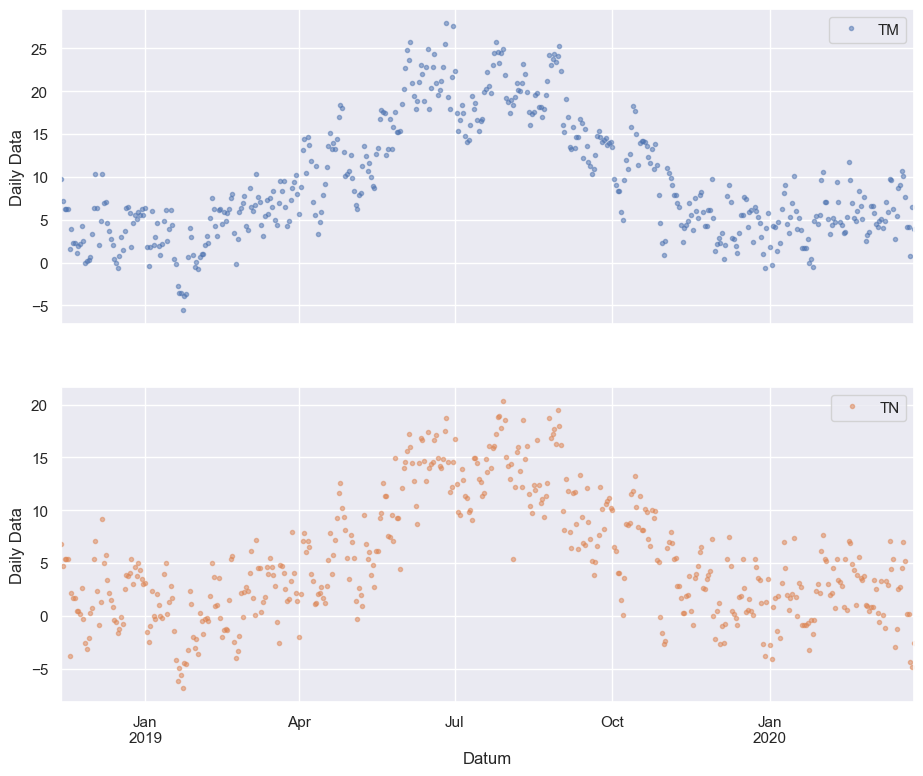

In [59]:
cols_plot = ["TM", "TN"]
axes = df[cols_plot].plot(
    marker=".", alpha=0.5, linestyle="None", figsize=(11, 9), subplots=True
)
for ax in axes:
    ax.set_ylabel("Daily Data")

### Zoom in:

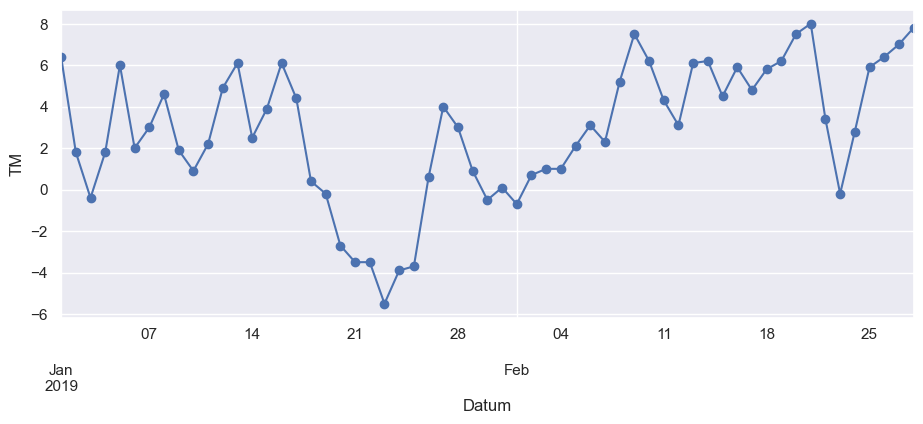

In [60]:
ax = df.loc["2019-01":"2019-02", "TM"].plot(marker="o", linestyle="-")
ax.set_ylabel("TM")

Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

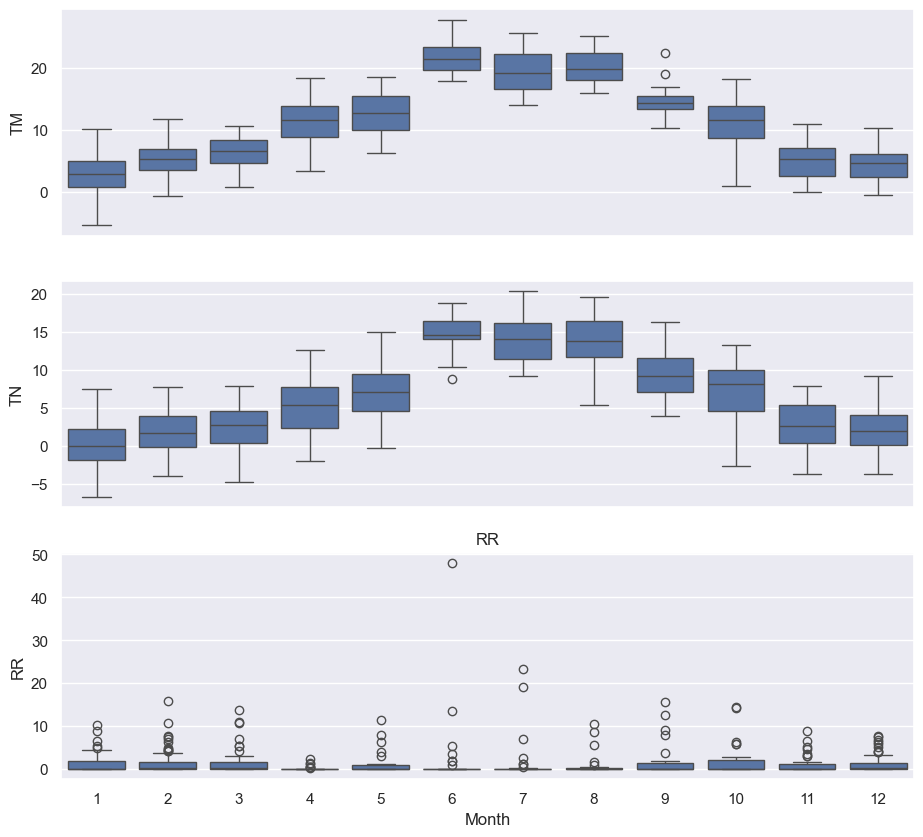

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["TM", "TN", "RR"], axes):
    sns.boxplot(data=df, x="Month", y=name, ax=ax)
ax.set_ylabel("RR")
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel("")

These box plots confirm the yearly seasonality that we saw in earlier plots!

### Recall the Exercises: 

> #### **Exercise:**
> Was the sun shining last summer? Plot the Sonnenscheindauer 'SO' (or another variable) from the DWD data set for the time slice Mai, Juni, July and August 2020 

> #### **Exercise:**
> 1. Load the data set Tagesmittel_Dahlem_MD.csv <br>
> 2. Fill the missing values of the maximal temperature TX variable with the monthly mean 
> 3. Calculate and plot the weekly mean of the maximal temperature variable <br>

> #### **Exercise:**
> Compute the weekly and monthly means of the maximal temperature TX of the DWD data set in the time range 01.01.2019 - 31.12.2019. 
> Plot the results.


> #### **Exercise:**
> Compute the rooling  3 day, 7 day and 14 day rolling means of the maximal temperature TX of the DWD data set in the time range 01.01.2019 - 31.12.2019. 
> Plot the results.

In [62]:
from IPython.display import IFrame

IFrame(
    src="../citations/citation_Soga.html",
    width=900,
    height=200,
)